___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 3: Math for Data Science

## Lab work 3

# Векторна математика

In [1]:
import numpy as np 

x = np.array([0.5, 0.5])
y = np.array([0.3, 0.7])

In [2]:
# скалярний добуток
 
x @ y

0.5

In [3]:
#Евклідова норма
np.linalg.norm(x)

0.7071067811865476

In [5]:
np.linalg.norm(y)

0.7615773105863908

In [4]:
help(np.linalg.norm)

Help on function norm in module numpy.linalg:

norm(x, ord=None, axis=None, keepdims=False)
    Matrix or vector norm.
    
    This function is able to return one of eight different matrix norms,
    or one of an infinite number of vector norms (described below), depending
    on the value of the ``ord`` parameter.
    
    Parameters
    ----------
    x : array_like
        Input array.  If `axis` is None, `x` must be 1-D or 2-D, unless `ord`
        is None. If both `axis` and `ord` are None, the 2-norm of
        ``x.ravel`` will be returned.
    ord : {non-zero int, inf, -inf, 'fro', 'nuc'}, optional
        Order of the norm (see table under ``Notes``). inf means numpy's
        `inf` object. The default is None.
    axis : {None, int, 2-tuple of ints}, optional.
        If `axis` is an integer, it specifies the axis of `x` along which to
        compute the vector norms.  If `axis` is a 2-tuple, it specifies the
        axes that hold 2-D matrices, and the matrix norms of these

In [6]:
#Мангеттенська норма
np.sum(np.abs(x))

1.0

In [8]:
np.linalg.norm(y, ord=1)

1.0

In [7]:
np.linalg.norm(x, ord=1)

1.0

In [12]:
#Кут між векторами

In [9]:
cos_a = (x @ y) / (np.linalg.norm(x) * np.linalg.norm(y))

In [10]:
np.degrees(np.arccos(cos_a))

21.801409486351798

In [11]:
np.linalg.norm(x-y)

0.282842712474619

In [12]:
np.linalg.norm(x, y)

/opt/python/envs/default/lib/python3.8/site-packages/numpy/linalg/linalg.py:2517: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  (ord in ('f', 'fro') and ndim == 2) or


ValueError: ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# Solving Linear Equations

Систему рівнянь називають сумісною, якщо вона має хоча б один розв’язок, і
несумісною, якщо вона не має жодного розв’язку.

Сумісна система називається визначеною, якщо вона має єдиний розв’язок.
Сумісна система називається невизначеною, якщо вона має більше, ніж один
розв’зок.

Матриця має бути квадратною та мати повний ранг, тобто має існувати обернена матриця.

$$

x_1 + 2x_2 = 5\\

3x_1 + 4x_2 = 6

$$

In [17]:
A = np.array(
     [[1 , 2],
     [3 , 4]]
)

b = np.array(
    [  [5], 
        [6]]
)

In [18]:
from numpy.linalg import matrix_rank
matrix_rank(A) 

2

In [19]:
x = np.linalg.solve(A, b)
x

array([[-4. ],
 [ 4.5]])

# Апроксимація функцій

https://machinelearningmastery.com/curve-fitting-with-python/

https://personal.math.ubc.ca/~pwalls/math-python/linear-algebra/linear-algebra-scipy/

Розглянемо складну математичну функцію на відрізку

f(x) = sin(x / 5) exp(x / 10) + 5 exp(-x / 2)

Вона може описувати, наприклад, залежність оцінок, які виставляють певному ґатунку вина експерти, залежно від віку цього вина. По суті завдання машинного навчання полягає в тому, щоб наблизити складну залежність за допомогою функції. Як варіант, можна наблизити цю функцію за допомогою многочленів

In [20]:
%matplotlib inline
import math
import scipy
import numpy as np
from matplotlib import pyplot as plt

def f(x):
    return math.sin(x/5.)*math.exp(x/10.) + 5*math.exp(-x/2.)

In [21]:
x = np.arange(1, 16, 0.1)
y = list(map(f, x))

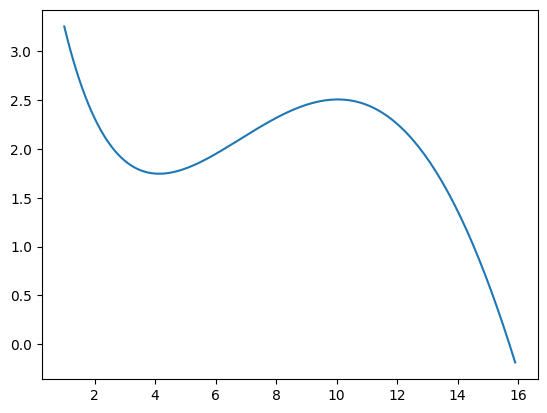

In [22]:
plt.plot(x, y)

In [29]:
x_points = [2, 4, 8, 10,  16]

def get_matrixe(x_points):
    """Матриця з многочленів степеня len(x_points)"""
    matrixe = []
    
    for x in x_points:
        row = []
        for i in range(len(x_points)):
            row.append(x**i)
        
        matrixe.append(row)
    
    return matrixe

A = get_matrixe(x_points)
A

[[1, 2, 4, 8, 16],
 [1, 4, 16, 64, 256],
 [1, 8, 64, 512, 4096],
 [1, 10, 100, 1000, 10000],
 [1, 16, 256, 4096, 65536]]

In [30]:
y_points = list(map(f, x_points))
y_points

[2.3150338432311584,
 1.7468459495903677,
 2.316170159053224,
 2.5054164070002463,
 -0.28745171200358255]

In [31]:
w = np.linalg.solve(A, y_points)
w

array([ 4.29909673e+00, -1.47342684e+00, 2.75243499e-01, -1.79451851e-02,
 3.36142323e-04])

In [32]:
def get_app(w, x_points):
    y = []
    
    for x in x_points:
        y_row = 0
        
        for j in range(len(w)):
            y_row += w[j] * (x**j)
        y.append(y_row)
        
    return y


y_app = get_app(w, x)

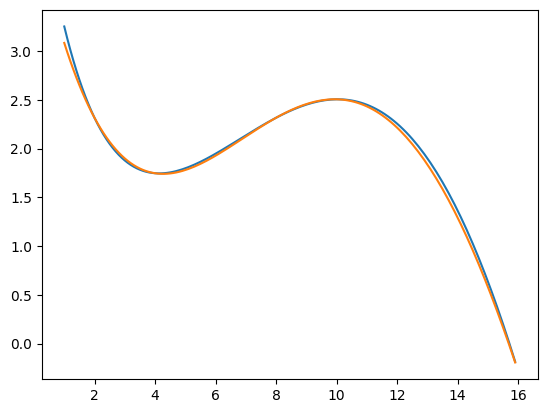

In [33]:
fig, ax = plt.subplots()

ax.plot(x, y)
ax.plot(x, y_app)

# Задачі оптимізації

У багатьох задачах вимагається не просто знайти який-небудь розв&#39;язок, а
підібрати серед усіх розв&#39;язків найкращий (оптимальний). Йдеться про такі
задачі, як підбір збалансованого раціону харчування, оптимізація
асортименту продукції, оптимізація транспортних перевезень та багато інших
– їх ще називають оптимізаційними.
Перш ніж приступати до розв&#39;язування оптимізаційної задачі, потрібно
описати її в математичному вигляді, тобто побудувати її математичну
модель. Модель оптимізаційної задачі складається з таких елементів:

- змінні – невідомі величини, значення яких потрібно знайти в результаті
розв&#39;язання задачі;

- цільова функція – величина, яка залежить від змінних і значення якої
потрібно максимізувати чи мінімізувати;

- критерій – вимога мінімізації чи максимізації цільової функції.
  
- обмеження – умови, яким мають задовольняти змінні.
  
Найпростішою оптимізаційною задачею вважається задача пошуку
максимального або мінімального значення функції однієї змінної. 
Добре дослідженим та важливим для планування виробничих процесів
різновидом оптимізаційних задач є задачі лінійного програмування (ЗЛП),
тобто задачі, в яких цільова функція та обмеження є лінійними.
Загалом алгоритм розв&#39;язання оптимізаційної задачі такий.
1. Введення позначень. Потрібно визначити, яка змінна яку величину
позначатиме.
2. Створення цільової функції та критерію. Слід визначити, яка величина
максимізуватиметься чи мінімізуватиметься, та записати формулу
залежності цієї величини від змінних, тобто формулу цільової функції.
Нею може бути вартість продукції, обсяг прибутку, обсяг витрат на
виробництво та перевезення.
3. Складання системи обмежень. Обмеження – це нерівності або рівності,
яким мають задовольняти значення змінних.
4. Розв&#39;язання задачі. Деякі оптимізаційні задачі можна розв’язати
аналітично, без використання комп&#39;ютера, проте цей спосіб надто
трудомісткий. 

### Задача 1

Витрати на рекламу в місяць не повинні перевищувати 10 000 $. 

Хвилина радіореклами коштує 5, а телереклами 90

Фірма має намір використовувати радіорекламу в три рази частіше ніж телерекламу. 

Практика показує, що 1 хвилина телереклами забезпечує обсяг продажів в 30 разів більший ніж 1 хвилина радіореклами.

**Умови:**

$ x1 $ - к-сть хв на радіорекламу 

$ x2 $ - к-сть хв на телерекламу 

$ 30x1 + x2 -> max$

$ 5x1+90x2 <=10000 $

$ 3x2 = x1 $



In [27]:
L =  [ [1, 2] ]
L

[[1, 2]]

In [24]:
from scipy.optimize import linprog


c = [-1,-30] #Функция цели
A_ub = [5,90]  #'1'   
b_ub = [10000]#'1'   
A_eq = [[3,-1]] #'2'   
b_eq = [0] #'2'   

linprog(с=[-1,-30], A_ub=A_ub, b_ub, A_eq, b_eq)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -3309.0909090909095
              x: [ 3.636e+01  1.091e+02]
            nit: 0
          lower:  residual: [ 3.636e+01  1.091e+02]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: [ 0.000e+00]
                 marginals: [ 2.182e-01]
        ineqlin:  residual: [ 0.000e+00]
                 marginals: [-3.309e-01]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

### Задача 2

Скільки потрібно працівників на роботу в ресторан, якщо один працівник працює 5 днів в тижень.
Враховуючи наплив клієнтів, в кожен день тижня потрібна певна к-сть працівників:

Д1 = 14

Д2 = 13

Д3 = 15

Д4 = 16

Д5 = 19

Д6 = 18 

Д7 = 11 

Дану задачу можна представити такою системою:
$$
 \begin{array}{rll}
 \displaystyle \min_{x\in \mathbb{R}^7} & x_1 + x_2 + x_3 + x_4 + x_5 + x_6 + x_7 \\
 \,{\rm s.t.} & \begin{array}[t]{rcl}
            x_1 + x_4 + x_5 + x_6 + x_7 & \geq & 14 \\
            x_1 + x_2 + x_5 + x_6 + x_7 & \geq & 13 \\
            x_1 + x_2 + x_3 + x_6 + x_7 & \geq & 15 \\
            x_1 + x_2 + x_3 + x_4 + x_7 & \geq & 16 \\
            x_1 + x_2 + x_3 + x_4 + x_5 & \geq & 19 \\
            x_2 + x_3 + x_4 + x_5 + x_6 & \geq & 18 \\
            x_3 + x_4 + x_5 + x_6 + x_7 & \geq & 11 \\
            x_i & \geq & 0 ~~~~ \forall ~i
       \end{array}
   \end{array}
$$

### Задача 3

*Центральна гранична теорема* — теорема теорії ймовірностей про збіжність розподілу суми незалежних однаково розподілених випадкових величин до нормального розподілу. Ця теорема підкреслює особливість нормального розподілу в теорії ймовірностей.

In [ ]:
# https://www.kaggle.com/mnavas/mexico-city-and-quito-extra-data/?select=mex_clean.csv

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
taxi_mex = pd.read_csv('mex_clean.csv')
taxi_mex.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec
0,1,México DF Taxi de Sitio,2016-09-16 07:14:12,2016-09-18 04:41:40,-99.097369,19.416874,-99.202729,19.430353,N,120449,12373,242
1,2,México DF Taxi Libre,2016-09-18 06:16:33,2016-09-18 10:11:43,-99.297148,19.322128,-99.289949,19.326538,N,14110,1700,461
2,3,México DF Taxi Libre,2016-09-18 10:11:50,2016-09-18 10:23:11,-99.289603,19.326263,-99.271874,19.328530,N,681,2848,129
3,4,México DF Taxi Libre,2016-09-18 10:23:38,2016-09-18 10:30:53,-99.271161,19.328875,-99.279900,19.326256,N,436,1409,106
4,5,México DF Taxi Libre,2016-09-18 10:44:18,2016-09-18 10:51:40,-99.282761,19.326944,-99.291705,19.322754,N,442,1567,85


   id                vendor_id      pickup_datetime     dropoff_datetime  \
0   1  México DF Taxi de Sitio  2016-09-16 07:14:12  2016-09-18 04:41:40   
1   2     México DF Taxi Libre  2016-09-18 06:16:33  2016-09-18 10:11:43   
2   3     México DF Taxi Libre  2016-09-18 10:11:50  2016-09-18 10:23:11   
3   4     México DF Taxi Libre  2016-09-18 10:23:38  2016-09-18 10:30:53   
4   5     México DF Taxi Libre  2016-09-18 10:44:18  2016-09-18 10:51:40   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -99.097369        19.416874         -99.202729         19.430353   
1        -99.297148        19.322128         -99.289949         19.326538   
2        -99.289603        19.326263         -99.271874         19.328530   
3        -99.271161        19.328875         -99.279900         19.326256   
4        -99.282761        19.326944         -99.291705         19.322754   

  store_and_fwd_flag  trip_duration  dist_meters  wait_sec  
0                  

In [ ]:
taxi_mex.shape

(12694, 12)

(array([9.420e+03, 2.108e+03, 7.020e+02, 2.480e+02, 1.000e+02, 3.500e+01,
        2.300e+01, 2.400e+01, 1.300e+01, 8.000e+00, 4.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

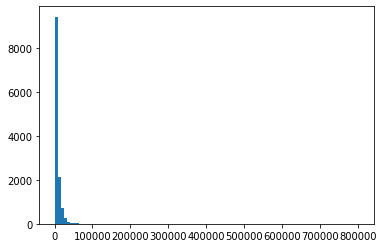

<Figure size 432x288 with 1 Axes>

In [ ]:
plt.hist(taxi_mex['dist_meters'], bins=100)

In [ ]:
taxi_mex.shape

(12694, 12)

In [ ]:
def generate_distribution_sample(data, sample_size, dist_size):
    sample_means = []
    for i in range(dist_size):
        sample = np.random.choice(a = data, size = sample_size)
        sample_means.append(np.mean(sample))
    return sample_means

In [ ]:
sample_size = 1000000
dist_size = 50000
sample_means = generate_distribution_sample(taxi_mex['dist_meters']/1000, sample_size, dist_size)

KeyboardInterrupt: KeyboardInterrupt: 

In [ ]:
plt.hist(sample_means, bins=100)
plt.xlabel('distance in km')

In [ ]:
np.sort(sample_means)
lb = np.percentile(sample_means, 2.5)
ub = np.percentile(sample_means, 97.5)
print("conf interval", (lb, ub))

conf interval (6.459584370000001, 6.906920025)


#### Перевірка на нормальність

In [ ]:
from numpy.random import seed, normal

seed(1)

mean = 50
stev = 10


results1 = normal(mean, stev, 1000)

In [ ]:
mean = 60
stev = 10

results2 = normal(mean, stev, 1000)

In [ ]:
from pandas import DataFrame
results = DataFrame()
results['A'] = results1
results['B'] = results2

In [ ]:
print(results.describe())

                 A            B
count  1000.000000  1000.000000
mean     50.388125    60.273254
std       9.814950    10.305528
min      19.462356    28.466425
25%      43.998396    53.529044
50%      50.412926    60.313135
75%      57.039989    67.298686
max      89.586027    94.326634


In [ ]:
from matplotlib import pyplot

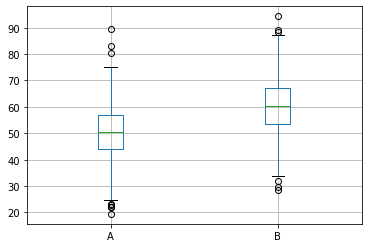

<Figure size 432x288 with 1 Axes>

In [ ]:
results.boxplot()
pyplot.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000231A2D68188>,
      dtype=object)

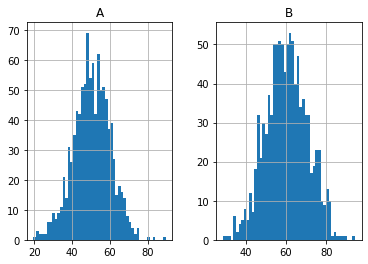

<Figure size 432x288 with 2 Axes>

In [ ]:
results.hist(bins=50)

Normaltest повертає 2-кортеж статистики хі-квадрат і пов'язане з ним значення p. Враховуючи нульову гіпотезу про те, що x надходить із нормального розподілу, p-значення представляє ймовірність.

Якщо p-val дуже малий, це означає, що малоймовірно, щоб дані надходили з нормального розподілу

In [ ]:
from scipy.stats import normaltest

value, p = normaltest(results['A'])
print(value, p)
if p >= 0.05:
    print('Похоже, що розподіл нормальний')
else:
    print('Результат навряд чи нормальний')

2.9901307811630033 0.22423394146329606
Похоже, що розподіл нормальний


In [ ]:
value, p = normaltest(sample_means)
if p >= 0.05:
    print('Похоже, що розподіл нормальний')
else:
    print('Результат навряд чи нормальний')

Результат навряд чи нормальний


Нульова гіпотеза тесту ($H_0$) або очікування за замовчуванням полягає в тому, що статистика описує нормальний розподіл.

Ми не зможемо відкинути цю гіпотезу, якщо значення р більше 0,05. Ми відкидаємо цю гіпотезу, якщо p-значення < = 0,05. В цьому випадку ми вважаємо, що розподіл не є нормальним з імовірністю 95%

#### Перевіряємо, чи є різниця між середніми статистично важлива

In [ ]:
from scipy.stats import ttest_ind
value, pvalue = ttest_ind(results['A'], results['B'], equal_var=True)
print(value, pvalue)
if pvalue > 0.05:
    print('Вибірки з одинакового розподілу')
else:
    print('Вибірки з різних розподілів')

-21.96493964531936 5.803252034443177e-96
Вибірки з різних розподілів


### Задача 3

#### Вбудовані метод SciPy

- *ttest_ind* :
    
    t-критерій для середніх значень двох незалежних зразків балів. Це двосторонній тест на нульову гіпотезу про те, що 2 незалежні вибірки мають однакові середні (очікувані) значення. Цей тест передбачає, що популяції мають однакові дисперсії за замовчуванням.
    

- *ttest_rel* : 
    
    Це двосторонній тест на нульову гіпотезу про те, що 2 пов’язані або повторні зразки мають однакові середні (очікувані) значення.
    
    
- *ttest_1samp* - 

    t-тест для середнього значення ОДНОЇ групи.

Припустимо, що ми хочемо перевірити час очікування таксі. Ми припускаємо, що середній
час очікування - це десять хвилин. Для цього в stats вже реалізовані всі методи, і для перевірки одновиборочного критерію ми використовуємо метод ttest_1samp. Для цього нам необхідно
передати нашу вибірку і також передати те значення середнього, яке ми очікуємо побачити.

Результатом роботи цього методу буде певний клас, який повертає два параметри:
statistic - це, власне кажучи, t-статистика, і розрахований pvalue.

In [ ]:
sample = taxi_mex['wait_sec']/60
value, p = stats.ttest_1samp(sample, 10)

if p > 0.05:
    print('Подібні середні')
else:
    print('Не подібні')

Не подібні


In [ ]:
taxi_mex['pickup_datetime'] = pd.to_datetime(taxi_mex.pickup_datetime)
taxi_mex['month'] = taxi_mex['pickup_datetime'].dt.month

control = taxi_mex[taxi_mex.month == 11]['trip_duration'].sample(n=1000)
treatment = taxi_mex[taxi_mex.month == 12]['trip_duration'].sample(n=1000)

value, p = stats.ttest_rel(control, treatment)


if p > 0.05:
    print('Подібні середні')
else:
    print('Не подібні')

Подібні середні
